In [55]:
%matplotlib inline 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import itertools

## Matrix defining a linear 2d sysetm
See https://tex.stackexchange.com/questions/347201/drawing-the-trace-determinant-diagram-on-latex/347401

In [56]:
# M = np.matrix('.2,-.1; 1., 2')

# Other Choices.  Coupled if off diagonal terms are non-zero
# M = np.matrix('1 0;0 1') # positive evals
# M = np.matrix('-10 0;0 -1') # negative evals
# M = np.matrix('2 0;0 -2') # opposite sign evals

# Recall matrix rep of complex a +/i bi is [a,-b; b, a]
M = np.matrix('[0 -2;2 0]') #a +/- bi with a = 0 
#M = np.matrix('[1 -1;1  1') #a +/- bi with a > 0
#M = np.matrix('[0 0;0  1]') #one eval is 0
#M = np.matrix('[0 0;1  0]') #both evals 0
#M = np.matrix('[0 0;0  0]') #zero matrix

In [57]:
print("\nMatrix M")
print(M)    
print("\nEigenvalues")
print(np.linalg.eigvals(M))    
print("\nExponent of M")
print(np.expm1(M))    
print("\nTrace of M")
print(np.trace(M))
print("\nDeterminant of M")
print(np.linalg.det(M))


Matrix M
[[ 0 -2]
 [ 2  0]]

Eigenvalues
[0.+2.j 0.-2.j]

Exponent of M
[[ 0.         -0.86466472]
 [ 6.3890561   0.        ]]

Trace of M
0

Determinant of M
4.0


## The ODE

In [58]:
# 2d Linear system
def ode(x,t):
    
    # Main matrix multiplication
    dx = np.squeeze(np.array(x * M)) # Convert np matrix to regular array
    
    # Return the state derivatives
    return dx

## Plot a Single Orbit

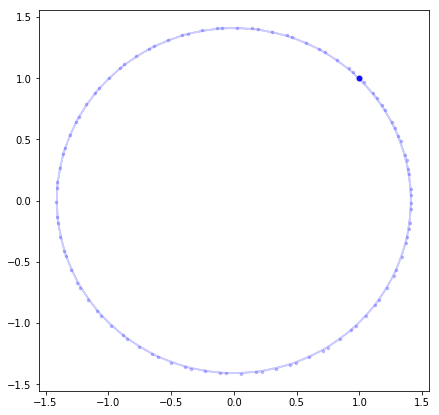

In [76]:
fig = plt.gcf()
fig.set_size_inches(7,7)

t = np.arange(0, 10, .1) # Times

ic = [1,1] # initial condition
orbit = odeint(ode, ic, t) 
plt.plot(orbit[:,0],orbit[:,1], '.-',color='b',ms=5,alpha = .2) 
plt.plot(ic[0],ic[1], '.', color = 'b', ms=10, alpha=.9)


## Plot a set of orbits from a grid of initial conditions

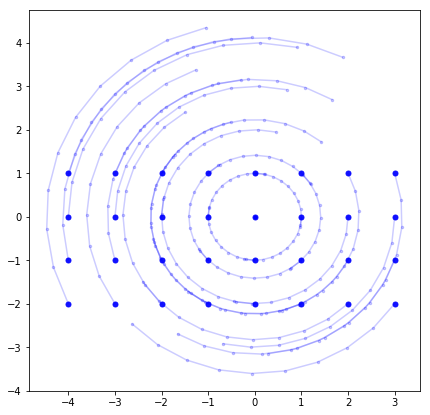

In [73]:
fig = plt.gcf()
fig.set_size_inches(7,7)
# A grid of initial conditions to test
t = np.arange(0, 1, .1) # Times
for x,y in itertools.product(range(-4,4), range(-2,2)):
    ic = [x,y] # initial condition
    orbit = odeint(ode, ic, t) # Run the dst; integrate the ode
    plt.plot(orbit[:,0],orbit[:,1], '.-',color='b',ms=5,alpha = .2) 
    plt.plot(ic[0],ic[1], '.', color = 'b', ms=10, alpha=.9) # Initial Condition
